In [155]:

import pandas as pd
import pymysql
from sql_info import USER, PASSWORD, DB_NAME
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
import seaborn as sns 

# 한글 깨지는 현상 수정
f_path = "C:/windows/Fonts/malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')


import warnings
warnings.filterwarnings(action = 'ignore')

In [154]:
print(str(end_date))


2022-08-08
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     ---------------------------------------- 38.6/38.6 MB 4.8 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\dowra\OneDrive\바탕 화면\Project02 - Hankyung\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [124]:
# 22년 1월 1일부터 데이터가 수집되었음 - 조회시 참고
def read_sql_weeks(n):

    db = pymysql.connect(host='localhost', user = USER, passwd = PASSWORD, db = DB_NAME, charset = 'utf8')

    # 일단 메모리 측면에서 생각해보면 당연히 쿼리를 날려서 일부 데이터만 메모리에 올리는 쪽이 훨씬 효율적일 것

    end_date = datetime.today().date()
    start_date = end_date - timedelta(weeks = n)
    
    # query1 = (f"SELECT r.company as company, r.date as date, r.written_by as written_by, \
    #            c.code as code, c.category as category, r.reports_idx as reports_idx\
    #             FROM reports r \
    #             JOIN companies c \
    #             ON r.company = c.company \
    #             WHERE date >= '{start_date}' and date <= '{end_date}'")

    query1 = (f"SELECT r.company as company, r.date as date, r.written_by as written_by, \
            c.code as code, c.category as category, r.reports_idx as reports_idx\
            FROM reports r \
            JOIN companies c \
            ON r.company = c.company \
            WHERE date >= '{start_date}' and date <= '{end_date}'")

    
    # 미리 merge를 하지 않고, query1에서 조회된 기업들에 대한 데이터만 query2에서 불러오는 방식을 쓰겠음
    query2 = (f"SELECT * \
                FROM companies")

    reports_df = pd.read_sql_query(query1, db)
    # reports_df.drop_index()

    db.close()
    
    reports_df['reports_link'] = f"http://hkconsensus.hankyung.com/apps.analysis/analysis.downpdf?report_idx={reports_df['reports_idx']}"   
    
    return reports_df, start_date, end_date

In [129]:
reports_df, start_date, end_date = read_sql_weeks(12)
reports_df.tail()

,company,date,written_by,code,category,reports_idx,reports_link
108,클리오,2022-05-16,메리츠증권,237880,화장품,609200,http://hkconsensus.hankyung.com/apps.analysis/...
109,한화손해보험,2022-05-16,유안타증권,000370,손해보험,609164,http://hkconsensus.hankyung.com/apps.analysis/...
110,HMM,2022-05-16,이베스트증권,011200,해운사,609125,http://hkconsensus.hankyung.com/apps.analysis/...
111,대덕전자,2022-05-16,대신증권,353200,전자장비와기기,609109,http://hkconsensus.hankyung.com/apps.analysis/...
112,대덕전자,2022-05-16,SK증권,353200,전자장비와기기,609091,http://hkconsensus.hankyung.com/apps.analysis/...


           category counts
전자장비와기기          10    NaN
화학                8    NaN
제약                8    NaN
화장품               7    NaN
건강관리장비와용품         6    NaN


<AxesSubplot:ylabel='category'>

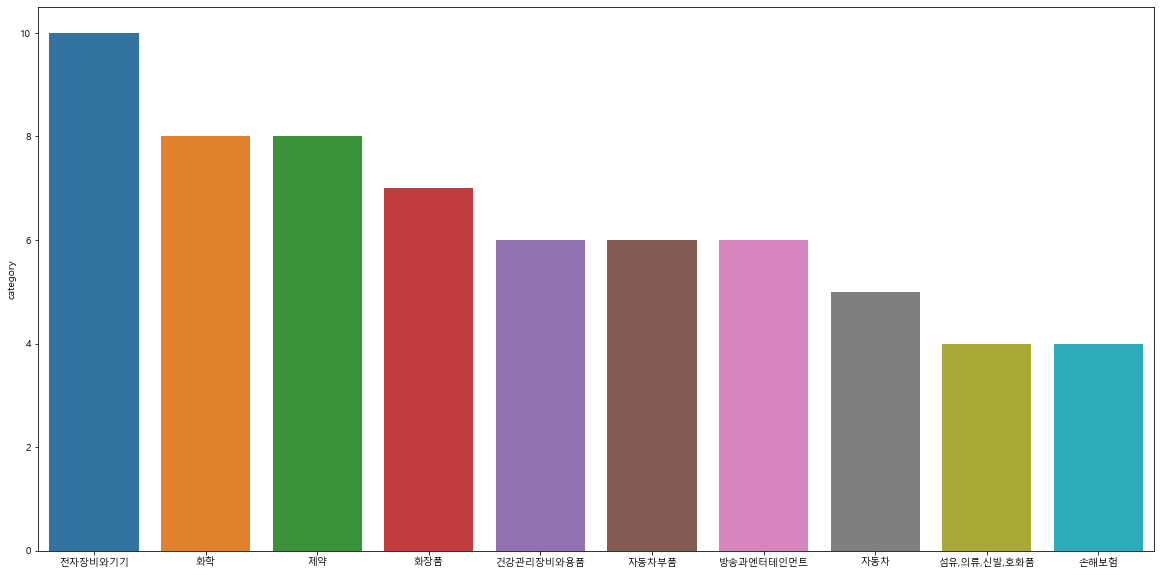

In [180]:
# import matplotlib.pyplot as plt 


categories = pd.DataFrame(categories, columns=["category", "counts"])
print(categories.head())
# print(type(categories))
# plt.figure(figsize = (20, 10))
# plt.title(f'{start_date} ~ {end_date}까지 상향 보고서가 나온 산업 상위 10개')
# plt.bar(x.index, x.values)
# plt.show()

plt.figure(figsize = (20, 10))
# sns.countplot(x = 'category', data = reports_df, palette = "pastel") # 이거는 조건을 주기가 어려운데?
sns.barplot(x = reports_df['category'].value_counts().index[0:10], y = reports_df['category'].value_counts()[0:10])


In [186]:
# 어떤 조건의 데이터를 조회하고 싶다면 조건문을 넣으면 됨 : groupby
x = reports_df[reports_df['category'] == "전자장비와기기"]['company'].value_counts()
print(x)

for i in x.index:
    print(reports_df[reports_df['company'] == f'{i}'])
    
reports_df[reports_df['company'] == "LG이노텍"]

LG이노텍    4
대덕전자     4
비에이치     2
Name: company, dtype: int64
   company        date written_by    code category reports_idx  \
21   LG이노텍  2022-07-29     이베스트증권  011070  전자장비와기기      612004   
28   LG이노텍  2022-07-28       SK증권  011070  전자장비와기기      611885   
45   LG이노텍  2022-07-05     이베스트증권  011070  전자장비와기기      611060   
62   LG이노텍  2022-06-10       대신증권  011070  전자장비와기기      610218   

                                         reports_link  
21  http://hkconsensus.hankyung.com/apps.analysis/...  
28  http://hkconsensus.hankyung.com/apps.analysis/...  
45  http://hkconsensus.hankyung.com/apps.analysis/...  
62  http://hkconsensus.hankyung.com/apps.analysis/...  
    company        date written_by    code category reports_idx  \
60     대덕전자  2022-06-14      유안타증권  353200  전자장비와기기      610333   
63     대덕전자  2022-06-08     하이투자증권  353200  전자장비와기기      610126   
111    대덕전자  2022-05-16       대신증권  353200  전자장비와기기      609109   
112    대덕전자  2022-05-16       SK증권  353200  전자장비와기기      609

,company,date,written_by,code,category,reports_idx,reports_link
21,LG이노텍,2022-07-29,이베스트증권,011070,전자장비와기기,612004,http://hkconsensus.hankyung.com/apps.analysis/...
28,LG이노텍,2022-07-28,SK증권,011070,전자장비와기기,611885,http://hkconsensus.hankyung.com/apps.analysis/...
45,LG이노텍,2022-07-05,이베스트증권,011070,전자장비와기기,611060,http://hkconsensus.hankyung.com/apps.analysis/...
62,LG이노텍,2022-06-10,대신증권,011070,전자장비와기기,610218,http://hkconsensus.hankyung.com/apps.analysis/...
